# Stroke Risk Prediction

In our previous steps, we successfully cleaned up and explored our dataset, gaining valuable insights and ensuring data quality. Now, we will move on to the crucial phase of preprocessing our data. This stage involves preparing the data for modeling by transforming it into a format that machine learning algorithms can effectively utilize.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.utils import resample

In [28]:
#load cleaned data set from EDA
df = pd.read_csv('cleaned_dataset.csv')

In [29]:
#Preview data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,formerly smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,formerly smoked,0


To prepare our data for modeling, we must first transform it to ensure accurate execution of our models. One important step is removing the 'id' column, as it doesn't hold any meaningful information and could potentially interfere with the analysis.

In [30]:
#Drop 'id' column
df = df.drop(columns=['id'])

print(df.head())

   gender   age  hypertension  heart_disease ever_married     work_type  \
0    Male   3.0             0              0           No      children   
1    Male  58.0             1              0          Yes       Private   
2  Female   8.0             0              0           No       Private   
3  Female  70.0             0              0          Yes       Private   
4    Male  14.0             0              0           No  Never_worked   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Rural              95.12  18.0  formerly smoked       0  
1          Urban              87.96  39.2     never smoked       0  
2          Urban             110.89  17.6     never smoked       0  
3          Rural              69.04  35.9  formerly smoked       0  
4          Rural             161.28  19.1  formerly smoked       0  


## Feature Importance

In this section, we aim to identify the most significant features influencing stroke prediction in our dataset. While we have body biometrics like BMI and glucose levels, we will also investigate other factors such as work type and marital status to see if they play a crucial role in predicting strokes.

<Axes: >

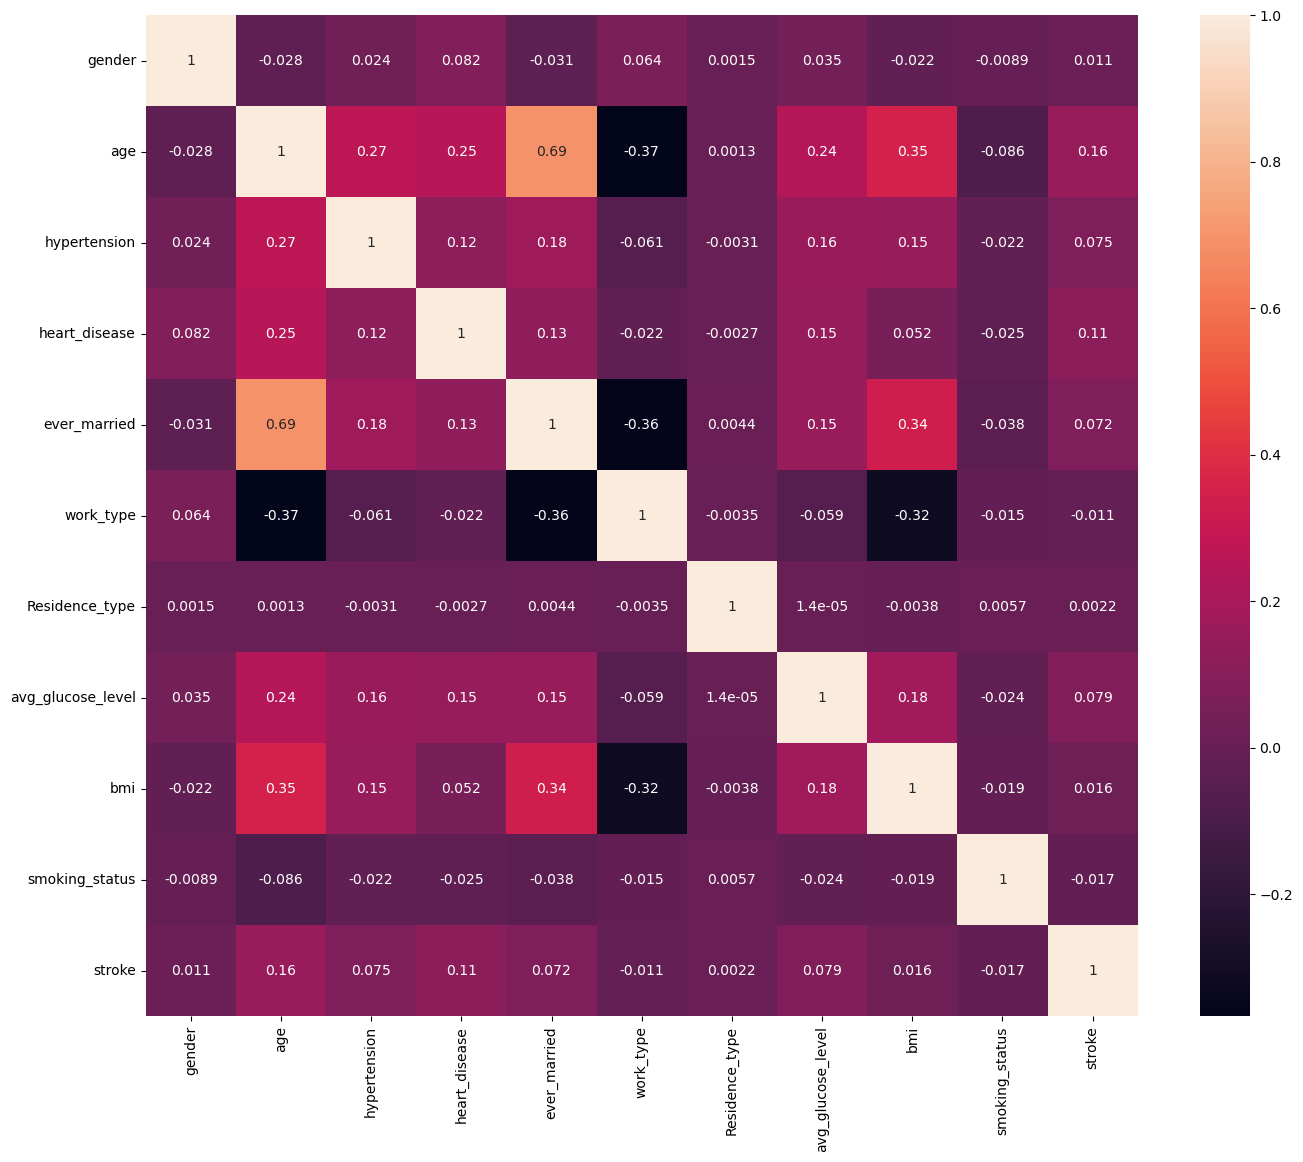

In [31]:
corr_data =df.copy()
encoder  =LabelEncoder()
for col in corr_data.select_dtypes(include="object").columns:
    corr_data[col] =encoder.fit_transform(corr_data[col])
    
plt.figure(figsize=(16,13))
sns.heatmap(data=corr_data.corr(),annot=True)


In our analysis of stroke prediction, we found that age, BMI, marital status, and average glucose levels are significant factors. It is expected that BMI, age, and glucose levels correlate with stroke risk, given that higher BMI and glucose levels are known risk factors, and older individuals are generally at higher risk for strokes. Interestingly, marital status also emerged as a notable factor. This may reflect that older individuals, who are at higher risk for strokes, are more likely to have been married at some point, rather than indicating a direct relationship between marital status and stroke risk. This insight underscores the importance of considering demographic variables alongside biometric data in predictive modeling.

### Transforming Data

In this phase, we focus on transforming our raw dataset into a format optimized for machine learning models. This includes handling categorical variables through encoding techniques, scaling numerical features to a uniform range, and splitting the data into training and testing sets for model evaluation. 

In [32]:
#Split data into positive stoke and negative
had_stroke = df[df["stroke"]==1]
no_stroke = df[df["stroke"]==0]

#resample data 
resampled_had_stroke = resample(had_stroke,replace=True , n_samples=no_stroke.shape[0] , random_state=123 )
resampled_data = pd.concat([no_stroke,resampled_had_stroke])

In [33]:
#Preview
print(resampled_data.head())

   gender   age  hypertension  heart_disease ever_married     work_type  \
0    Male   3.0             0              0           No      children   
1    Male  58.0             1              0          Yes       Private   
2  Female   8.0             0              0           No       Private   
3  Female  70.0             0              0          Yes       Private   
4    Male  14.0             0              0           No  Never_worked   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Rural              95.12  18.0  formerly smoked       0  
1          Urban              87.96  39.2     never smoked       0  
2          Urban             110.89  17.6     never smoked       0  
3          Rural              69.04  35.9  formerly smoked       0  
4          Rural             161.28  19.1  formerly smoked       0  


Here, we are addressing the class imbalance in our stroke dataset by performing a resampling technique. First, we split the data into two subsets: one containing individuals who have had a stroke (had_stroke) and another with those who have not (no_stroke). Given that the number of stroke cases is likely much smaller than the non-stroke cases, we use resampling to balance the classes. Specifically, we resample the had_stroke subset with replacement to create a new dataset (resampled_had_stroke) that has the same number of samples as the no_stroke subset. Finally, we concatenate the no_stroke subset with the resampled_had_stroke subset to form a balanced dataset (resampled_data). This balanced dataset will help improve the performance and fairness of our predictive model by ensuring that the model does not become biased towards the majority class.

In [34]:
#Make dummy variables for categorical columns
cols = ['gender','hypertension','heart_disease', 'ever_married', 'work_type', 'Residence_type','smoking_status']
dummy = pd.get_dummies(resampled_data[cols],dtype=int)
updated_df = pd.concat([resampled_data,dummy],axis=1).drop(columns=cols)

In this step, we are converting categorical variables into dummy variables to prepare the data for modeling. We first identify the columns with categorical data and create binary (dummy) variables for each category. This transformation is necessary because most machine learning algorithms require numerical input, and dummy variables allow us to include categorical data in our models effectively.

In [35]:
encoder = LabelEncoder()
updated_df["age"] = encoder.fit_transform(updated_df["age"])

We are using LabelEncoder to transform the age column from categorical to numeric values. This encoding assigns a unique integer to each distinct age, allowing the machine learning algorithm to process the age data effectively. This step is crucial as it ensures that the age data is in a suitable format for modeling.

In [36]:
# Select columns to scale
cols_to_scale = ['age', 'avg_glucose_level', 'bmi']

# Create a new DataFrame for scaled data
scaled_data = updated_df.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform selected columns
scaled_data[cols_to_scale] = scaler.fit_transform(scaled_data[cols_to_scale])

# Display preview of scaled data
scaled_data

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.233010,0.169964,0.090286,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0
1,0.766990,0.139631,0.332571,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
2,0.281553,0.236772,0.085714,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
3,0.883495,0.059479,0.294857,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
4,0.339806,0.450244,0.102857,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,0.922330,0.184495,0.177143,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0
23936,0.864078,0.518068,0.228571,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
3712,0.854369,0.029401,0.173714,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1
6701,0.864078,0.114806,0.194286,1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0


We are scaling the numerical data (age, avg_glucose_level, and bmi) using the MinMaxScaler. This transformation adjusts the values to a range between 0 and 1, ensuring that all features are on a similar scale. Scaling numerical features helps improve the performance and stability of machine learning models. Finally, we preview the transformed data to verify the changes.

In [37]:
#Create X and y variables 
X = updated_df.drop(columns="stroke")
y = updated_df["stroke"]

#Splilt into Training and Testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

Now we need to define our X and y variables, where y is our target variable (stroke) and X are our features. After that, we split our data into two parts: 80% for training the model and 20% for testing how well it works.

In [38]:
#View shape of transformed data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((68187, 18), (17047, 18), (68187,), (17047,))

We can check the shape of our X_train, X_test, y_train, and y_test to ensure that our data has been correctly split into training and testing sets. Here we can see our shapes align as expected and we can proceed to the modeling stage of our data analysis. 